
# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction about the dataset

>The dataset I have chosen for this project is TMDB (The Movie Database) Movie Dataset. This database is about atleast 10,000+ movies. The dataset contains information about the popularity, budget, cast, director, release date, revenue, etc. 
>This dataset contains 10866 movie samples and the information about them is distributed in 21 columns. 

### Questions I tried to answer through this dataset are as follows
01. Number of movies released from year to year? 
02. What is the highest, the average and the lowest runtime? 
03. Which year was the best for the industry on the basis of average profit?  
04. Which movies had earned the highest and the lowest revenues? 
05. Which combination of genres earned highest profits on average? 
06. Which Production Companies (top 15) had the highest number of releases? 
07. Which director's movies earned the highest revenues?
08. Top 20 Movies with the highest budget? 
09. Which runtime has the maximum popularity on average?
10. Which stars appeared in most number of movies?
11. Genres with most number of movies associated with them. 
12. Top 20 movies with the highest vote count.
13. Movies with maximum profits. 

> While answering the above questions my approach was to keep the code as simple as possible and 
use the commands and functions that were taught in Data Analysis Process lessons and case studies. My basic idea while analyzing this dataset was to subset and aggregate the data whenever possible using query() and groupby(). 

In [7]:
# import statements for all of the packages that we
#   plan to use.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set_style('darkgrid')


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 

### General Properties

In [8]:
# I have used Pandas to load and read the csv file for the dataset.

df= pd.read_csv('tmdb-movies.csv') 
df.head()  #this will give us an idea about the structure of our dataset. 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
#Before we proceed any further, it is important to get the basic details about our dataset before analyzing it.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The output shows that there are some columns that have missing values. Additionally, we can also notice that the column release_date is not having the correct datatype. I will fix this issue in the Data Cleaning section.  

In [10]:
#Now checking for the columns that are having null values using the following code 
df.isnull().sum(axis=0) 

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

As we can see that imdb_id, cast, homepage, director, tagline, keywords, overview, genres and production_companies have the null values. 

In [11]:
#Now checking for any duplicate rows.
sum(df.duplicated()) 

1

The output is 1. This means that there is one duplicate row in the dataset. We will fix this in our Data Cleaning section. 

### Data Cleaning 

In [12]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# Our first cleaning step is to drop the duplicate rows from our dataset (dedupe) as these only increase the length of our dataset. 
df.drop_duplicates(inplace=True)

In [13]:
#Confirming that the duplicate rows have been removed. The following code must return 0 to confirm the result.
sum(df.duplicated()) 

0

Since, the output is 0, we can say that there are no duplicate rows left in our dataset now. 

In [14]:
#Changing the datatype to release_date to the correct datatype.
df['release_date']=pd.to_datetime(df['release_date']) 
df.dtypes #for confirming the result

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

As you can see, the datatype of release_date is now datetime64[ns].   

In [15]:
#now checking for any rows that have null value.
df.isnull().sum(axis=1).any() 

True

since the output is true this means that there are rows with null values. So we need to drop them.

In [16]:
df.dropna(inplace=True) #for dropping the rows with null values in the dataset. 

In [17]:
df.isnull().sum(axis=1).any() #confirming that there are no rows with null values left in out dataset. 

False

As, the output is False, this means that there are no rows with null values left in the dataset. 

In [18]:
# replacing the zeros of revenue and budget with their respective means
df['revenue'].replace(0, df['revenue'].mean(), inplace=True)
df['budget'].replace(0, df['budget'].mean(), inplace=True)

In [19]:
#confirming that values have been replaced successfully
len(df[df['revenue']==0])

0

In [20]:
len(df[df['budget']==0])

0

Now, there are no more zeros left in the revenue and budget column. 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: In this section I focused on computing statistics and create visualizations with the goal of addressing the research questions that I posed in the Introduction section. 

### Research Question 1 : Number of movies released from year to year? 

In [21]:
# Grouping the release_year by the counts of id to get the number of movies released 
#year after year 

movies_per_year=df.groupby('release_year')['id'].count() 
movies_per_year

release_year
1961      1
1962      1
1963      1
1964      2
1965      1
1967      1
1969      1
1970      1
1971      4
1972      1
1973      2
1974      2
1975      3
1976      2
1977      3
1978      4
1979      5
1980      2
1981      6
1982      3
1983      6
1984      5
1985      4
1986      2
1987      8
1988      4
1989      5
1990      6
1991      3
1992      5
1993     10
1994      8
1995     10
1996     15
1997     11
1998     13
1999     24
2000     20
2001     19
2002     31
2003     40
2004     48
2005     72
2006     92
2007    135
2008    142
2009    192
2010    206
2011    219
2012    145
2013    128
2014    153
2015    165
Name: id, dtype: int64

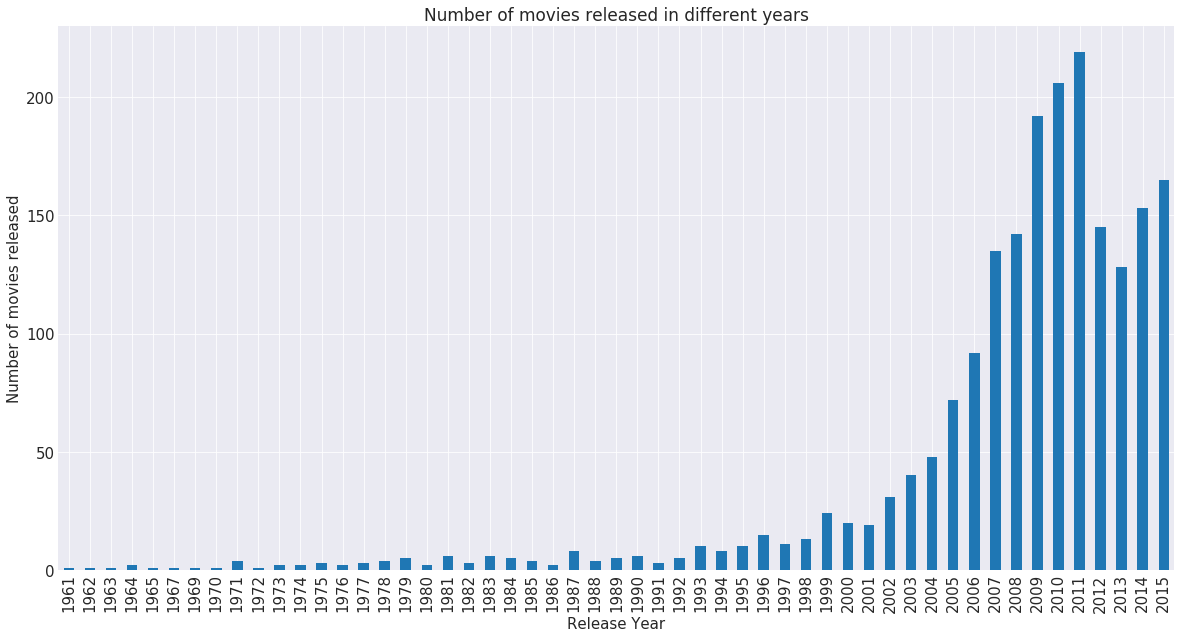

In [22]:
# now plotting the graph for the number of movies released year after year 
movies_per_year.plot(kind= 'bar', figsize=(20,10), fontsize=15);
plt.title('Number of movies released in different years', fontsize=17)
plt.xlabel('Release Year', fontsize=15)
plt.ylabel('Number of movies released', fontsize=15) 
plt.show() 

The line graph shows that **after the year 2000** there is a considerable increase in the number of movies released per year. In **2011, the number of movies released is the highest. 209 movies were released in that year.**  

### Research Question 2: What is the highest, the average and the lowest runtime? 

In [23]:
df['runtime'].describe() #this will give us useful descriptive statistics about runtime for better understanding

count    1992.000000
mean      106.040161
std        29.234592
min         0.000000
25%        92.000000
50%       102.000000
75%       116.000000
max       705.000000
Name: runtime, dtype: float64

In [24]:
#using max(), min() and avg() to get the maximum, minimum and average of runtime and storing them in respective variables. 
highest_run=df['runtime'].max() 
lowest_run=df['runtime'].min()
avg_run=df['runtime'].mean()
highest_run, lowest_run, avg_run

(705, 0, 106.04016064257029)

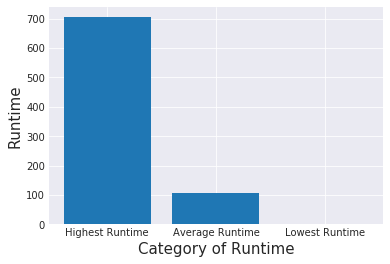

In [25]:
#for plotting a bar graph of the runtimes, we need locations and heights of the bar
location=[1,2,3]
height=[highest_run, avg_run, lowest_run]
label= ['Highest Runtime', 'Average Runtime', 'Lowest Runtime']   
plt.bar(location, height, tick_label=label) 
plt.ylabel('Runtime', fontsize=15)
plt.xlabel('Category of Runtime',fontsize=15) 
plt.show() 

Since the units of runtime are not mentioned, I am taking runtime to be in minutes as it is the standard unit of runtime for movies.
As the graph shows, the highest runtime was around **700 minutes (705 to be exact)**, the average runtime was **106.0401 minutes** and the lowest runtime was **0 minutes**. 

In [26]:
#to know which movies had the maximum runtime
Max_run_movies=df.query('runtime==runtime.max()')  
Max_run_movies['original_title']

2722    Band of Brothers
Name: original_title, dtype: object

In [27]:
#to know which movies had the minimum runtime
Min_run_movies=df.query('runtime==runtime.min()') 
Min_run_movies['original_title']

334       Ronaldo
1289    Treehouse
Name: original_title, dtype: object

It is clear to us now that **Band of Brothers** had the maximum runtime while the movie **Ronaldo** had the minimum runtime. 

### Research Question 3: Which year was the best for the industry on the basis of average profit? 

Text(0,0.5,'Average Profit')

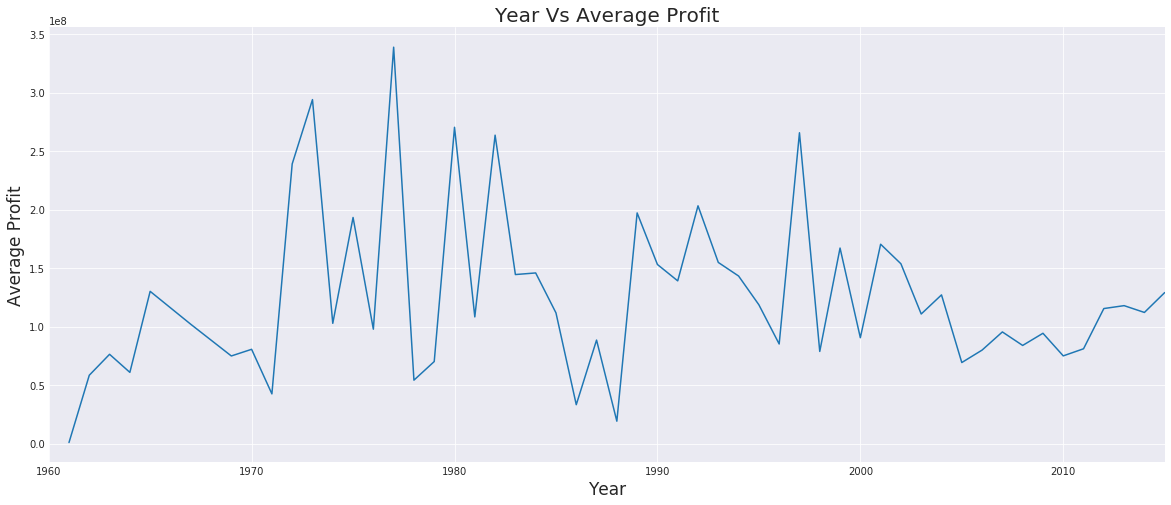

In [28]:
#calculating the profit earned by equating it to the difference between the 'revenue' and 'budget'
df['Profit']=df['revenue']-df['budget'] 
#aggregating the data on the basis of release_year and the average profit earned for plotting a graph
df.groupby('release_year')['Profit'].mean().plot(kind='line', xticks=np.arange(1960,2015,10), figsize=(20,8)) 


#setup the title and labels of the figure.
plt.title('Year Vs Average Profit', fontsize=20)
plt.xlabel('Year', fontsize=17)
plt.ylabel('Average Profit', fontsize=17)  

The graph shows the during **1975-1978, the film industry gained maximum profit.**

### Research Question 4: Which movies earned have the highest and the lowest revenues? 

In [29]:
#to get the descriptive statistical summary of 'revenue' 
df['revenue'].describe() 

count    1.992000e+03
mean     1.467954e+08
std      2.094969e+08
min      1.000000e+01
25%      3.193297e+07
50%      1.152153e+08
75%      1.278787e+08
max      2.781506e+09
Name: revenue, dtype: float64

In [30]:
#creating another dataframe from the original dataframe
#where the renevue is more than or equal to the average revenue
high_revenue=df.query('revenue>=revenue.mean()') 
high_revenue

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Profit
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09
5,281957,tt1663202,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08,3.979505e+08
6,87101,tt1340138,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08,2.856035e+08
7,286217,tt3659388,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08,4.873803e+08
8,211672,tt2293640,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09,1.082731e+09
9,150540,tt2096673,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08,6.787086e+08


In [31]:
#creating another dataframe from the original dataframe
#where the revenue is less than the average revenue
low_revenue=df.query('revenue<revenue.mean()') 
low_revenue

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Profit
12,264660,tt0470752,6.118847,1.500000e+07,3.686941e+07,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,http://exmachina-movie.com/,Alex Garland,There is nothing more human than the will to s...,...,108,Drama|Science Fiction,DNA Films|Universal Pictures International (UP...,2015-01-21,2854,7.6,2015,1.379999e+07,3.391985e+07,2.186941e+07
24,318846,tt1596363,4.648046,2.800000e+07,1.333465e+08,The Big Short,Christian Bale|Steve Carell|Ryan Gosling|Brad ...,http://www.thebigshortmovie.com/,Adam McKay,This is a true story.,...,130,Comedy|Drama,Paramount Pictures|Plan B Entertainment|Regenc...,2015-12-11,1545,7.3,2015,2.575999e+07,1.226787e+08,1.053465e+08
28,314365,tt1895587,4.062293,2.000000e+07,8.834647e+07,Spotlight,Mark Ruffalo|Michael Keaton|Rachel McAdams|Lie...,http://www.spotlightthefilm.com,Tom McCarthy,Break the story. Break the silence.,...,128,Drama|Thriller|History,Participant Media|Open Road Films|Anonymous Co...,2015-11-06,1559,7.8,2015,1.839999e+07,8.127872e+07,6.834647e+07
30,280996,tt3168230,3.927333,3.454924e+07,2.935520e+07,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015-06-19,425,6.4,2015,0.000000e+00,2.700677e+07,-5.194033e+06
31,198184,tt1823672,3.899557,4.900000e+07,1.020693e+08,Chappie,Sharlto Copley|Dev Patel|Ninja|Yolandi Visser|...,http://www.chappie-movie.com,Neill Blomkamp,I am consciousness. I am alive. I am Chappie.,...,120,Crime|Action|Science Fiction,Columbia Pictures|Media Rights Capital|Sony Pi...,2015-03-04,1990,6.6,2015,4.507998e+07,9.390369e+07,5.306927e+07
35,264644,tt3170832,3.557846,6.000000e+06,3.540176e+07,Room,Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...,http://www.roomthemovie.com,Lenny Abrahamson,Love knows no boundaries,...,117,Drama|Thriller,Element Pictures|No Trace Camping|A24|Duperele...,2015-10-16,1520,8.0,2015,5.519998e+06,3.256960e+07,2.940176e+07
39,167073,tt2381111,3.227329,1.100000e+07,6.207614e+07,Brooklyn,Saoirse Ronan|Domhnall Gleeson|Emory Cohen|Emi...,http://www.foxsearchlight.com/brooklyn/,John Crowley,"Two countries, two loves, one heart",...,111,Drama|Romance,Wildgaze Films|Irish Film Board|Item 7|Paralle...,2015-11-04,754,7.3,2015,1.012000e+07,5.711002e+07,5.107614e+07
41,274854,tt1618442,3.080505,9.000000e+07,1.403966e+08,The Last Witch Hunter,Vin Diesel|Rose Leslie|Michael Caine|Elijah Wo...,http://www.thelastwitchhunter.movie/,Breck Eisner,Hunt forever.,...,106,Fantasy|Action|Adventure,Summit Entertainment|Atmosphere Entertainment ...,2015-10-21,879,5.6,2015,8.279996e+07,1.291649e+08,5.039665e+07
44,293863,tt1655441,3.025852,2.500000e+07,4.262978e+07,The Age of Adaline,Blake Lively|Michiel Huisman|Harrison Ford|Ell...,http://theageofadalinemovie.com,Lee Toland Krieger,Love is timeless.,...,112,Fantasy|Drama|Romance,Lakeshore Entertainment|Sidney Kimmel Entertai...,2015-04-16,1221,7.3,2015,2.299999e+07,3.921938e+07,1.762978e+07
45,325348,tt3072482,3.023253,1.000000e+07,1.433379e+07,Hardcore Henry,Sharlto Copley|Haley Bennett|Danila Kozlovskiy...,http://stxmovies.com/hardcorehenry/,Ilya Naishuller,First they made him dangerous. Then they made ...,...,97,Action|Adventure|Science Fiction,Bazelevs Production|Versus Pictures,2015-09-12,396,5.9,2015,9.199996e+06,1.318708e+07,4.333790e+06


The reason behind creating two different dataframes from the original dataframe is to ease the process of analyzing the same data on two different conditions. Here the 2 conditions are whether the revenue earned by the movies is more or less than the average revenue. 

In [32]:
#it is very important to confirm that the sum of number of rows in both the newly created datasets is 
#equal to the number of rows in the original dataset. 
num_samples = df.shape[0]
num_samples== high_revenue['revenue'].count()+low_revenue['revenue'].count() 

True

Since the result is True, this means that the sum of number of rows in both the newly created datasets is 
equal to the number of rows in the original dataset. 

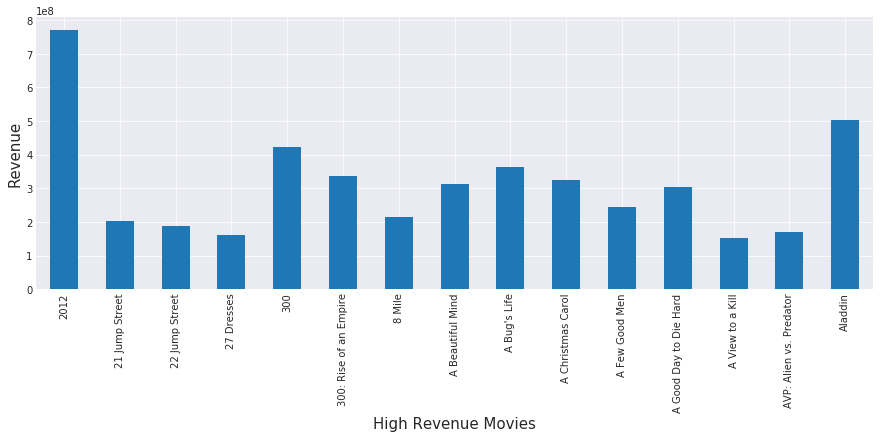

In [33]:
#aggregating the high_revenue dataframe on the basis of original_title by the maximum revenue earned 
#and then plot a bar graph by taking the top 15 values
high_revenue.groupby('original_title')['revenue'].max().iloc[:15].plot(kind='bar',figsize=(15,5)) 
plt.xlabel('High Revenue Movies', fontsize=15)
plt.ylabel('Revenue',fontsize=15)
plt.show() 

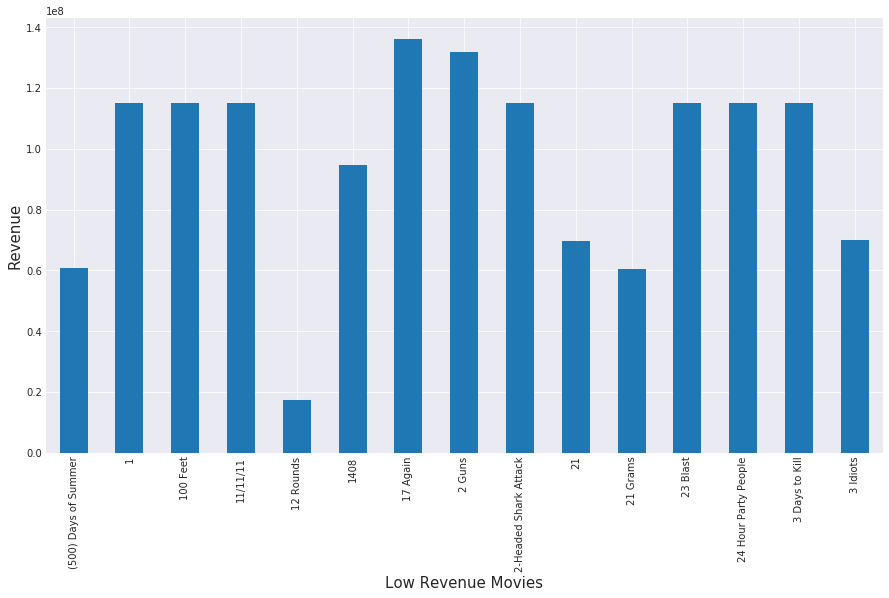

In [56]:
#same as above, aggregating the dataframe low_revenue and then plotting a bar graph
low_revenue.groupby('original_title')['revenue'].min().iloc[:15].plot(kind='bar', figsize=(15,8))
plt.xlabel('Low Revenue Movies', fontsize=15)
plt.ylabel('Revenue',fontsize=15)
plt.show() 

The above graphs show that **2012 was the movie that earned highest revenue**. On the other hand among the top 15 movies with lowest revenues, **12 rounds had the minimum revenue**. 

### Research Question 5: Which combination of genres earned more Profits on an average? 

In [35]:
#Aggregating the dataset on the basis of the genres (or combination of genres) by the average profit earned 
#by the repective movies

#sorting the values in descending order and taking top 20 values 
High_Profit_Genres=df.groupby('genres')['Profit'].mean().sort_values(ascending=False).iloc[0:20]
High_Profit_Genres


genres
Action|Adventure|Science Fiction|Fantasy             1.868178e+09
Adventure|Science Fiction                            8.571000e+08
Family|Fantasy|Adventure                             8.254671e+08
Drama|Action|Crime|Thriller                          8.169218e+08
Drama|Romance|Thriller                               8.108671e+08
Adventure|Fantasy|Family|Mystery                     7.882127e+08
Science Fiction|Adventure|Family|Fantasy             7.824106e+08
Family|Animation|Drama                               7.432418e+08
Action|Adventure|Fantasy|Science Fiction             7.195411e+08
Science Fiction|Thriller|Action|Adventure            7.174235e+08
Action|Thriller|Science Fiction|Mystery|Adventure    6.655000e+08
Adventure|Action|Fantasy                             6.416830e+08
Action|Adventure|Crime                               6.356746e+08
Science Fiction|Adventure|Thriller                   6.271002e+08
Science Fiction|Adventure|Fantasy                    6.162107e+08
Sci

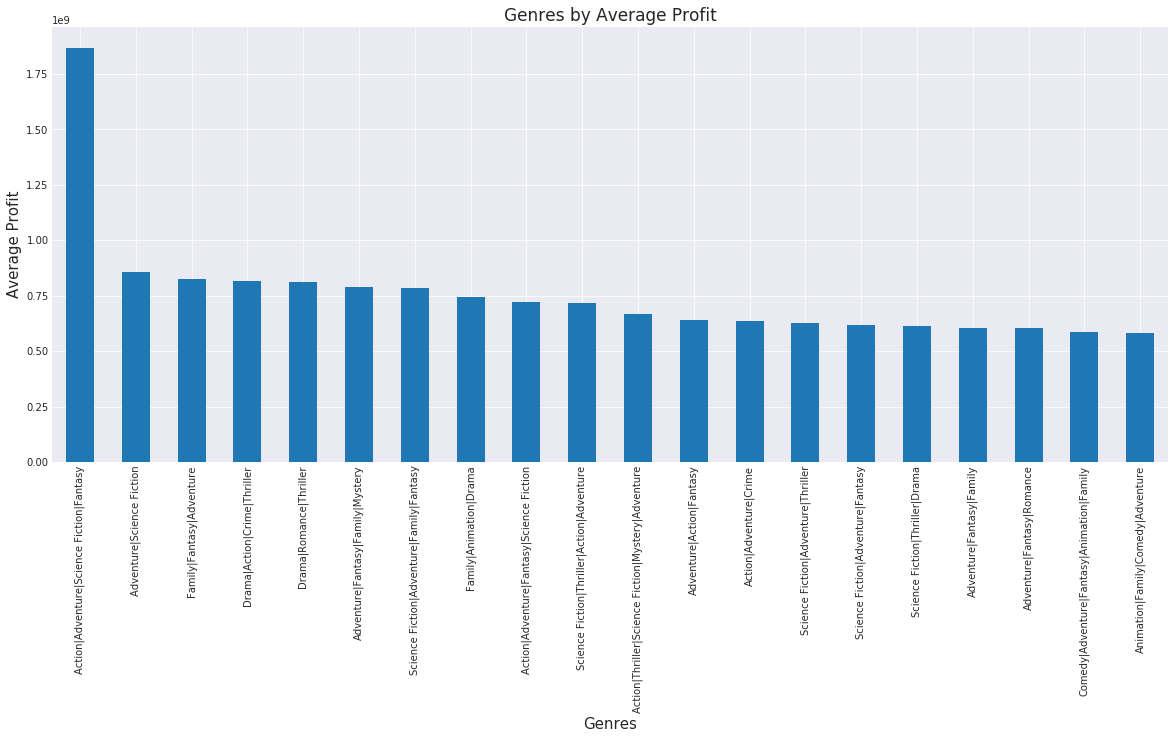

In [36]:
#plotting on the basis of above findings
High_Profit_Genres.plot(kind='bar', figsize=(20,8))

plt.title("Genres by Average Profit", fontsize=17)
plt.xlabel("Genres", fontsize=15)
plt.ylabel("Average Profit", fontsize=15)
plt.show() 

The graph clearly shows the the combination of **Action-Adventure-Science Fiction-Fantasy** earned the maximum average profit of **$ 1.868178e+09** 

### Research Question 6: Which production companies (top 15) had the highest number of releases? 

In [37]:
## aggregating the original dataframe on the basis of the production_companies and id count (to get the number of id related to
## a particular production_company )
## and then sorting the values in descending order and taking top 15 of them. 

Production_companies=df.groupby('production_companies')['id'].count() 
Top_15=Production_companies.sort_values(ascending=False).iloc[0:15] 
Top_15

production_companies
Walt Disney Pictures|Pixar Animation Studios          13
DreamWorks Animation                                  12
Marvel Studios                                        11
Universal Pictures                                    11
Walt Disney Pictures                                  10
New Line Cinema                                        9
Eon Productions                                        9
Columbia Pictures                                      8
Paramount Pictures                                     7
Walt Disney Pictures|Walt Disney Animation Studios     6
Eon Productions|Metro-Goldwyn-Mayer (MGM)              6
20th Century Fox                                       6
Warner Bros.                                           6
Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq       5
Dimension Films                                        5
Name: id, dtype: int64

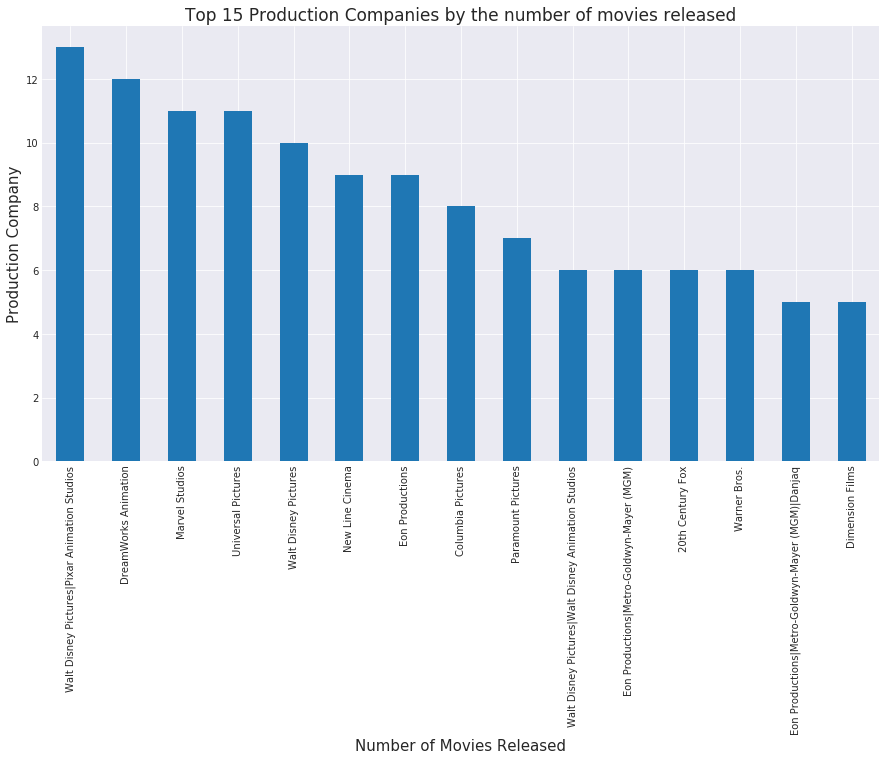

In [38]:
## plotting the graph for our findings 

Top_15.plot(kind='bar', figsize=(15,8))
plt.title('Top 15 Production Companies by the number of movies released', fontsize=17) 
plt.xlabel('Number of Movies Released', fontsize=15)
plt.ylabel('Production Company', fontsize=15)
plt.show() 

According to the graph, **Walt Disney Pictures & Pixar Animation Studios** released most number of movies, **13**. 

### Introducing the concept of defining and calling a funtion in the cells below. 

The idea behind using the functions by defining and calling them manually is just to reduce the amount of coding and 
to optimize the code. 

In [39]:
#defining a function group_bymax() and giving x and y as attributes
        # assigning the values to 'a' after aggregating, sorting and selectin values. 

def group_bymax(x,y): 
    a=df.groupby(x)[y].max().sort_values(ascending=False)[:20]
    return(a)

def graph(a, xlabel, ylabel):  #defining another funtion graph() and giving a, xlabel and ylabel as attributes. 
    b=a.plot(kind='bar', figsize=(20,8))  
    plt.xlabel(xlabel, fontsize=17)
    plt.ylabel(ylabel, fontsize=17) 
    plt.xticks(rotation=70)
    plt.show()

### Research Question 7 : Which director's movies earned the highest revenues?

In [40]:
#analyzing the directors and revenues of their movies. 
High_Revenue_Director=group_bymax('director', 'revenue') #calling the funtion group_bymax() 
High_Revenue_Director                               

director
James Cameron                 2.781506e+09
J.J. Abrams                   2.068178e+09
Joss Whedon                   1.519558e+09
Colin Trevorrow               1.513529e+09
James Wan                     1.506249e+09
David Yates                   1.327818e+09
Chris Buck|Jennifer Lee       1.274219e+09
Shane Black                   1.215440e+09
Kyle Balda|Pierre Coffin      1.156731e+09
Michael Bay                   1.123747e+09
Peter Jackson                 1.118889e+09
Sam Mendes                    1.108561e+09
Christopher Nolan             1.081041e+09
Gore Verbinski                1.065660e+09
Lee Unkrich                   1.063172e+09
Tim Burton                    1.025467e+09
Rob Marshall                  1.021683e+09
Chris Columbus                9.764756e+08
Pierre Coffin|Chris Renaud    9.707619e+08
George Lucas                  9.243176e+08
Name: revenue, dtype: float64

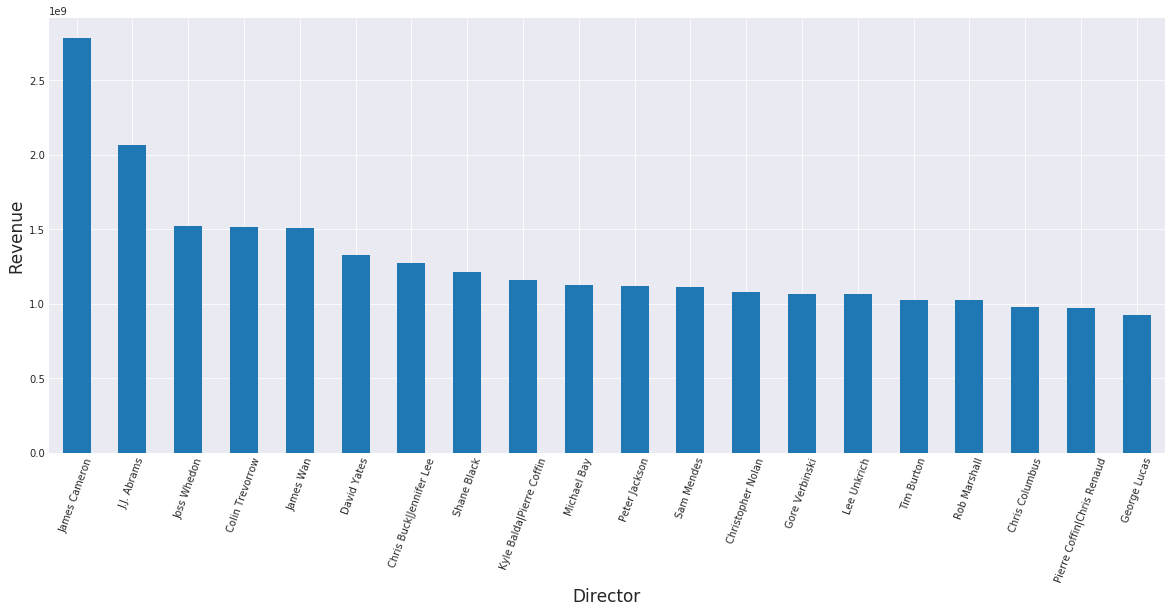

In [41]:
#plotting a graph for Director vs Revenue
xlabel="Director"
ylabel="Revenue"
graph(High_Revenue_Director, xlabel, ylabel) #calling the function graph() 

The result is that movie(s) directed by **James Cameron** earned the **maximum revenue.**

### Research Question 8: Top 20 Movies with the highest budgets?

In [42]:
#analyzing the movies and their budgets. 
High_Budget_Movie=group_bymax('original_title','budget') #calling the funtion groupby_max() 
High_Budget_Movie

original_title
The Warrior's Way                               425000000.0
Pirates of the Caribbean: On Stranger Tides     380000000.0
Pirates of the Caribbean: At World's End        300000000.0
Avengers: Age of Ultron                         280000000.0
Tangled                                         260000000.0
John Carter                                     260000000.0
Spider-Man 3                                    258000000.0
The Lone Ranger                                 255000000.0
X-Men: Days of Future Past                      250000000.0
Harry Potter and the Deathly Hallows: Part 1    250000000.0
The Dark Knight Rises                           250000000.0
Harry Potter and the Half-Blood Prince          250000000.0
The Hobbit: An Unexpected Journey               250000000.0
The Hobbit: The Battle of the Five Armies       250000000.0
The Hobbit: The Desolation of Smaug             250000000.0
Spectre                                         245000000.0
Avatar                   

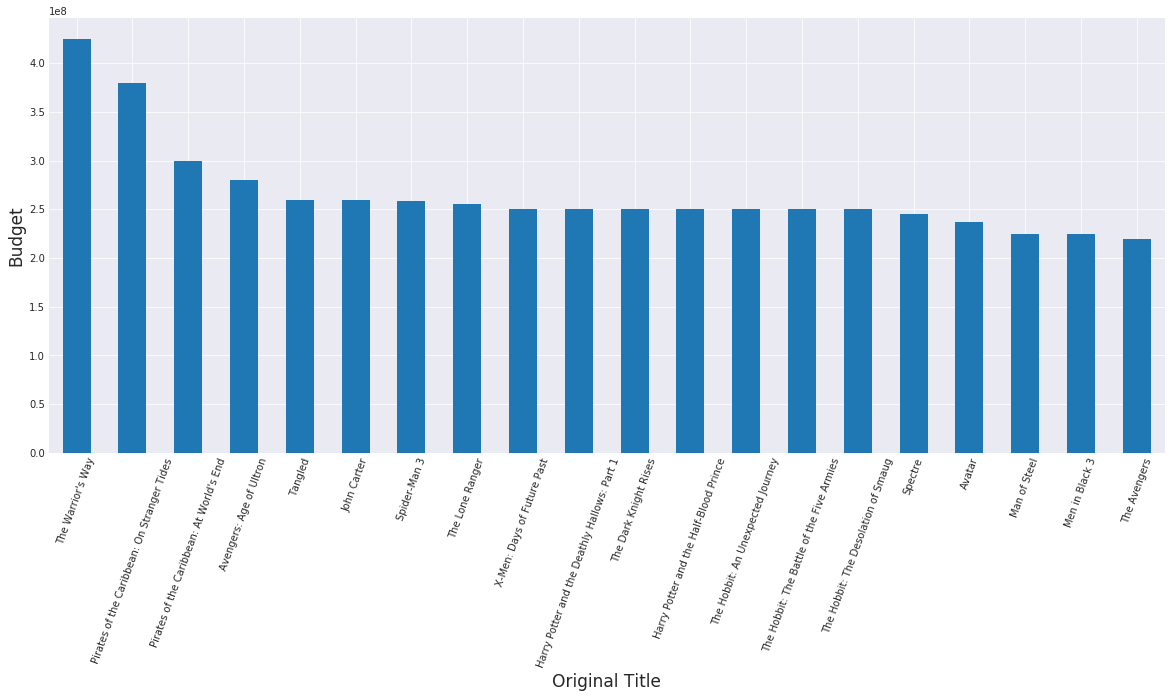

In [43]:
xlabel="Original Title"
ylabel="Budget"
graph(High_Budget_Movie, xlabel, ylabel) #calling the funtion graph() 

According the findings and the graph, **The Warrior's Way had the highest budget** of about ** $ 425000000**. 

### Research Question 9: Which runtime has the maximum popularity on average? 

In [44]:
Runtime=df.groupby('runtime')['popularity'].mean() #aggregating runtime by average popularity
Runtime_sorted=Runtime.sort_values(ascending=False).iloc[0:20] #sorting values in descending order and taking top 20 of them
Runtime_sorted

runtime
169    11.377819
156     9.110700
179     8.095275
143     6.019470
165     5.839859
175     5.738034
162     5.596964
136     5.185748
148     4.979652
178     4.901054
180     4.877927
194     4.355219
152     4.325727
161     4.310786
153     3.867985
201     3.687482
151     3.512871
124     3.388619
139     3.284548
141     3.087138
Name: popularity, dtype: float64

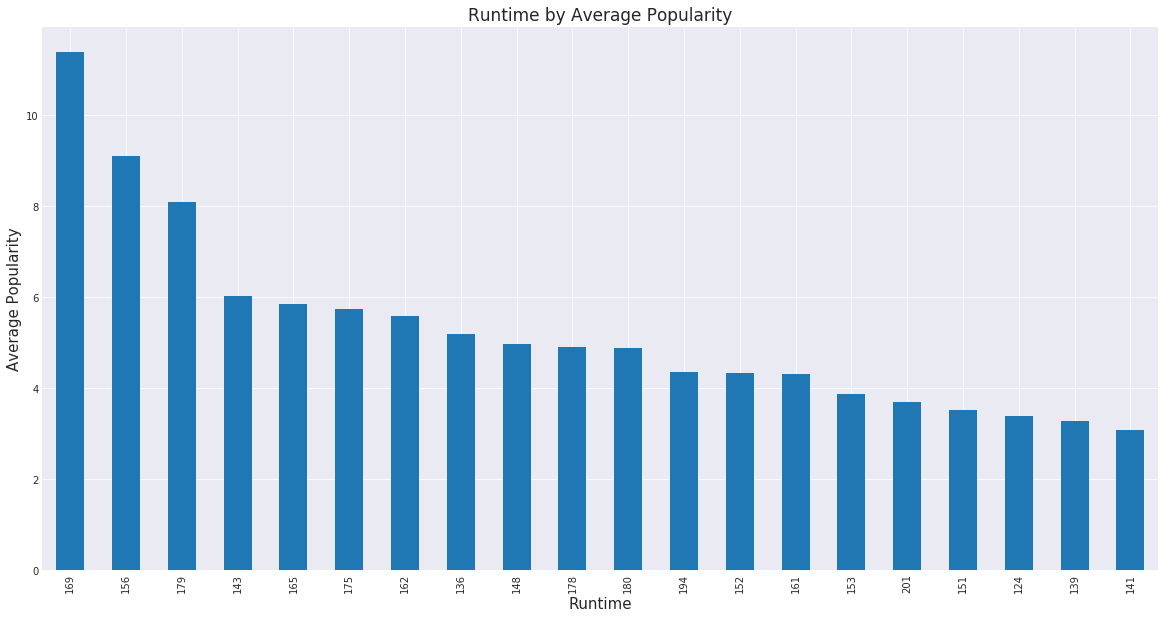

In [45]:
Runtime_sorted.plot(kind='bar', figsize=(20,10))
plt.title('Runtime by Average Popularity', fontsize=17)
plt.xlabel('Runtime', fontsize=15)
plt.ylabel('Average Popularity', fontsize=15)
plt.show()

Runtime of **169 minutes** had the **highest average popularity; 11.377819** 

In [46]:
#Defining a function most() for getting the most number of occurances of a term 
def most(x):
    array=df[x].str.cat(sep='|').split('|')
    series=pd.Series(array).value_counts().sort_values(ascending=False).iloc[0:20]
    return(series) 

### Research Question 10: Which stars appeared in most number of movies? 

In [47]:
# calling the funtion most() for getting the most number of occurances of an actor and then plotting it on a bar graph. 
cast=most('cast')
cast

Matt Damon           23
Samuel L. Jackson    20
Mark Wahlberg        20
Ryan Reynolds        19
Robert Downey Jr.    17
Anne Hathaway        17
Elizabeth Banks      17
Jason Statham        17
Jeff Bridges         17
Brad Pitt            16
Cameron Diaz         16
Emily Blunt          16
Ewan McGregor        16
Morgan Freeman       16
Paul Rudd            15
Cate Blanchett       15
Jennifer Aniston     15
John Goodman         15
Tom Hanks            15
Ben Affleck          15
dtype: int64

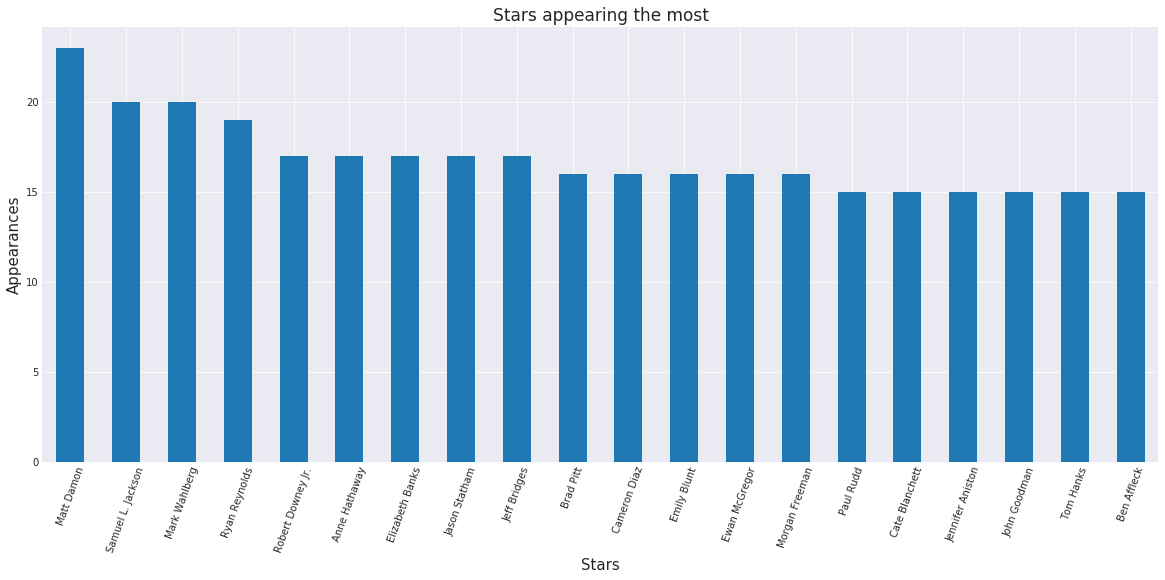

In [48]:
cast.plot(kind='bar', figsize=(20,8))
plt.title('Stars appearing the most', fontsize=17)
plt.xlabel('Stars', fontsize=15)
plt.ylabel('Appearances', fontsize=15) 
plt.xticks(rotation=70)
plt.show()

**Matt Damon appeared most number of times than any other actor; 23 times**. 

### Research Question 11: Which genres has the most number of movies related or associated with them?

In [49]:
#calling the function most() to get the most occurances of a genre and then plotting it on bar graph 
Genres=most('genres')
Genres

Drama              838
Comedy             640
Thriller           575
Action             532
Adventure          361
Romance            291
Science Fiction    291
Horror             273
Crime              262
Family             233
Fantasy            202
Animation          170
Mystery            148
Documentary         93
Music               72
History             56
War                 44
Western             20
TV Movie            16
Foreign              6
dtype: int64

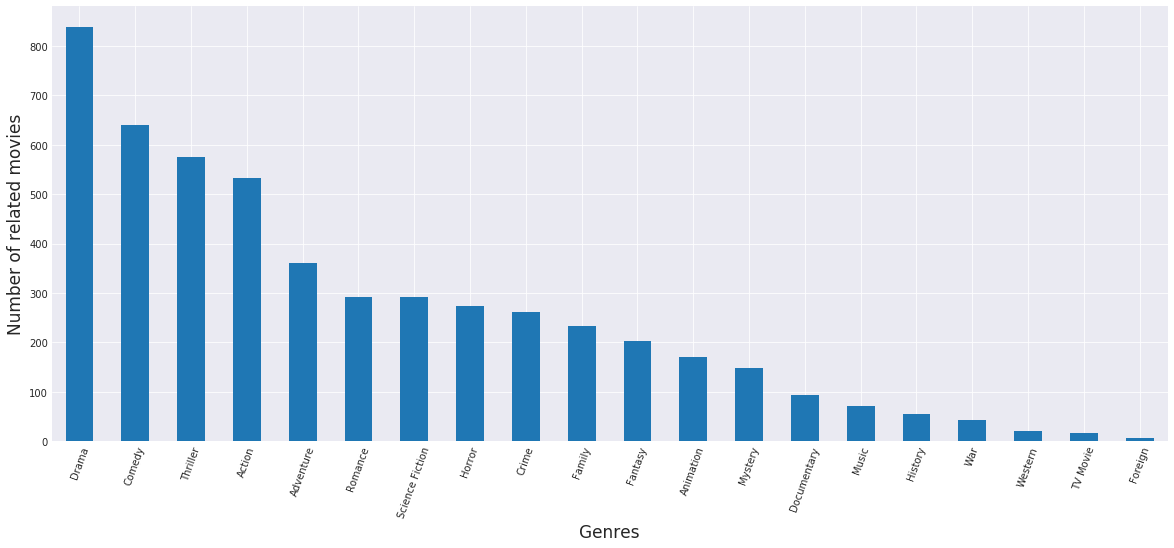

In [50]:
xlabel="Genres"
ylabel="Number of related movies"
graph(Genres, xlabel, ylabel) #calling the previously created function graph() for creating a bar graph of Genre vs Number of movies

As shown by the graph, **Drama** related movies are the most among all the genres. **838 movies are related to Drama genre**. 

### Research Question 12: Top 20 Movies with highest vote counts. 

In [51]:
#calling the previously created function group_bymax() to aggregate original_title
# by maximum vote_count 
Movie_VoteCounts=group_bymax('original_title', 'vote_count') 
Movie_VoteCounts

original_title
Inception                                            9767
The Avengers                                         8903
Avatar                                               8458
The Dark Knight                                      8432
Django Unchained                                     7375
The Hunger Games                                     7080
Iron Man 3                                           6882
The Dark Knight Rises                                6723
Interstellar                                         6498
The Hobbit: An Unexpected Journey                    6417
The Matrix                                           6351
Iron Man                                             6220
Mad Max: Fury Road                                   6185
Skyfall                                              6137
The Lord of the Rings: The Fellowship of the Ring    6079
Fight Club                                           5923
The Lord of the Rings: The Return of the King        5636

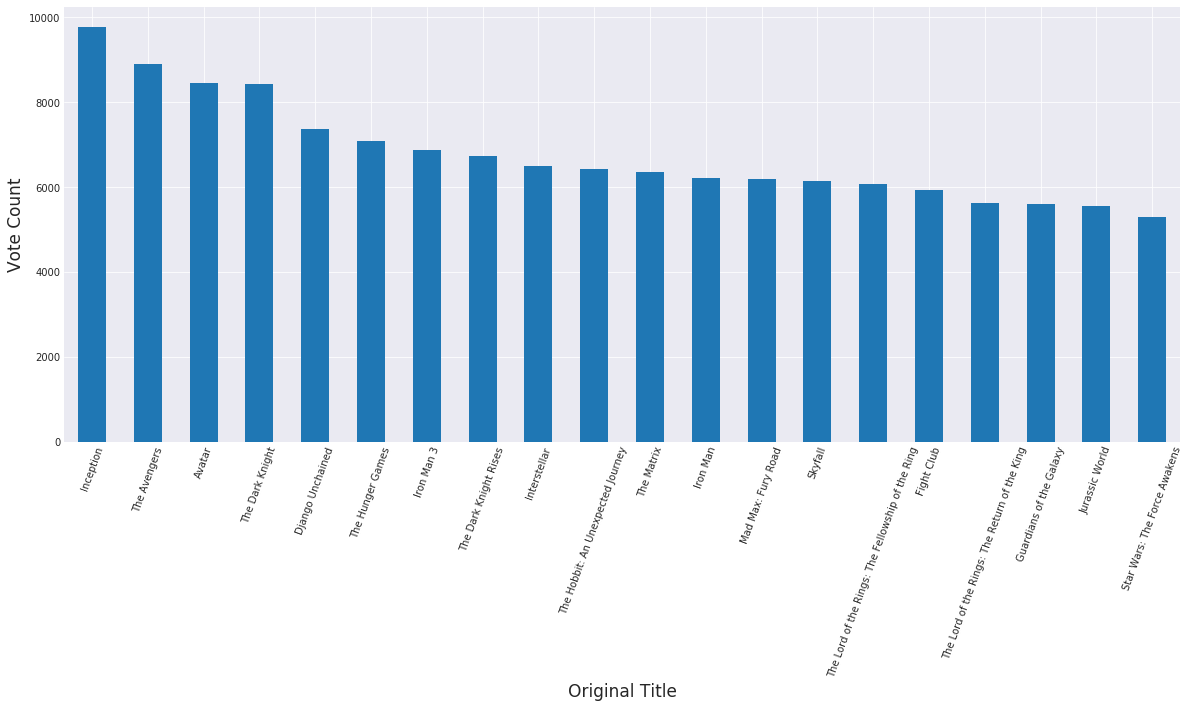

In [52]:
xlabel="Original Title"
ylabel="Vote Count"
graph(Movie_VoteCounts, xlabel, ylabel) ##calling the function graph() to plot the findings. 

Among the top 20 movies with highest vote counts, **Inception is at top with 9767 vote count**. 
Whereas, **Star Wars:The Force Awakens is at 20 with 5292 vote count**. 

### Research Question 13: Movies with maximum profits.

In [53]:
#calling the previously created function group_bymax() to aggregate original_title
# by maximum Profit
Movie_Profits=group_bymax('original_title', 'Profit') 
Movie_Profits

original_title
Avatar                                           2.544506e+09
Star Wars: The Force Awakens                     1.868178e+09
Titanic                                          1.645034e+09
Jurassic World                                   1.363529e+09
Furious 7                                        1.316249e+09
The Avengers                                     1.299558e+09
Harry Potter and the Deathly Hallows: Part 2     1.202818e+09
Avengers: Age of Ultron                          1.125036e+09
Frozen                                           1.124219e+09
Minions                                          1.082731e+09
The Lord of the Rings: The Return of the King    1.024889e+09
Iron Man 3                                       1.015440e+09
Transformers: Dark of the Moon                   9.287470e+08
Skyfall                                          9.085610e+08
Despicable Me 2                                  8.947619e+08
Pirates of the Caribbean: Dead Man's Chest       8.6565

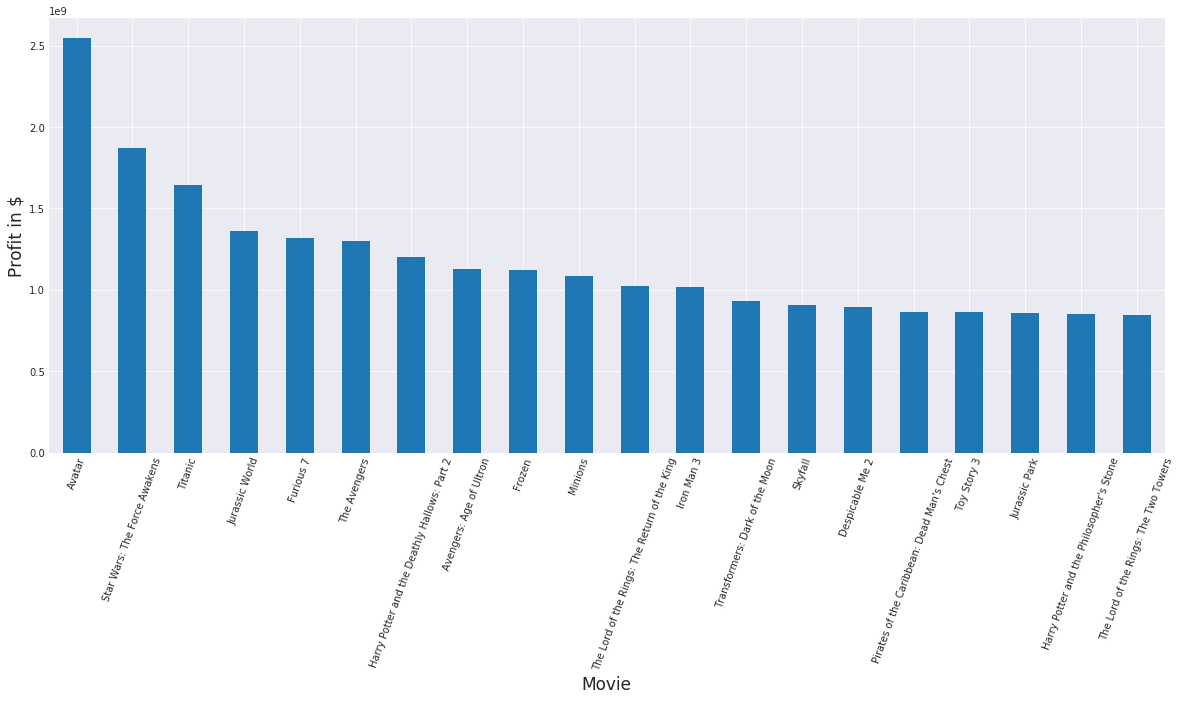

In [54]:
xlabel="Movie"
ylabel="Profit in $"
graph(Movie_Profits, xlabel, ylabel)

The bar graph clearly shows that **Avatar** is the **most profitable movie** till now. It earned a profit of **$ 2544505847**. 

<a id='conclusions'></a>
## Conclusions

>Through this project I tried to analyze the relationship among various parameters of a movie included in The Movie Database (TMDB) dataset. I tried to find the trend for those relationships using the libraries like Pandas, Numpy and Matplotlib. Through this project I was able to find out
01. Maximum movies released in a year.
02. Highest, Lowest and Average Runtime of movies.
03. Movies with highest revenues. 
04. Movies with highest profit.
05. Director with best results in terms of revenues. 
06. Movies with highest budgets. 
07. Runtime with maximum popularity. 
08. Genres with most movies. 
09. Combination of genres with their average profits. 
10. Highest voted movies of all time. 
11. Best production companies.
12. Year with maximum profits.  

#### Limitations:
01. A lot of values in some of the columns are missing. This doesn't leads to 100 % accurate analysis. 
02. Expenses about the movies were not mentioned besides mentioning the budget and revenue. There are a lot of chances that the     costs may not be equal to the budget. This affects the calculation of the real Profits. 
03. Units for some of the numerical values aren't provided.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0